Mean Absolute Error: 217.13
Mean Squared Error: 108930.40
R^2 Score: 0.02


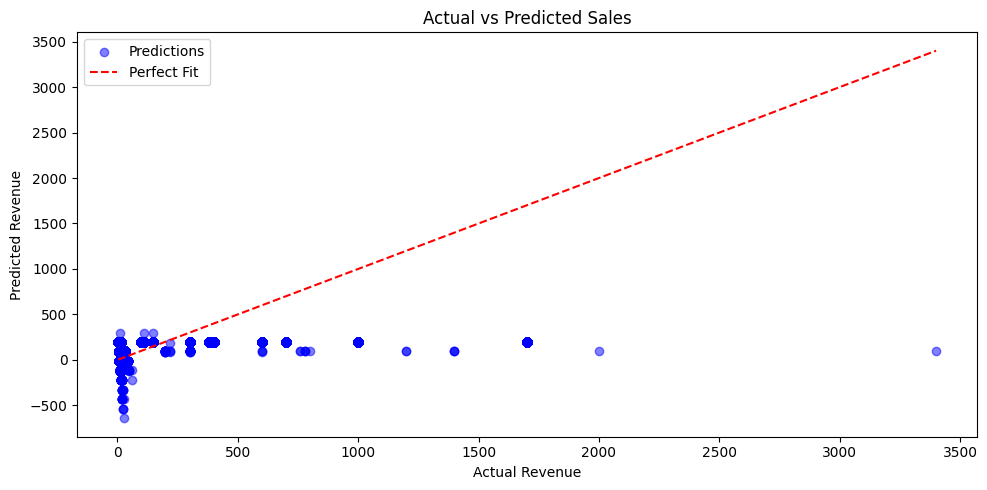

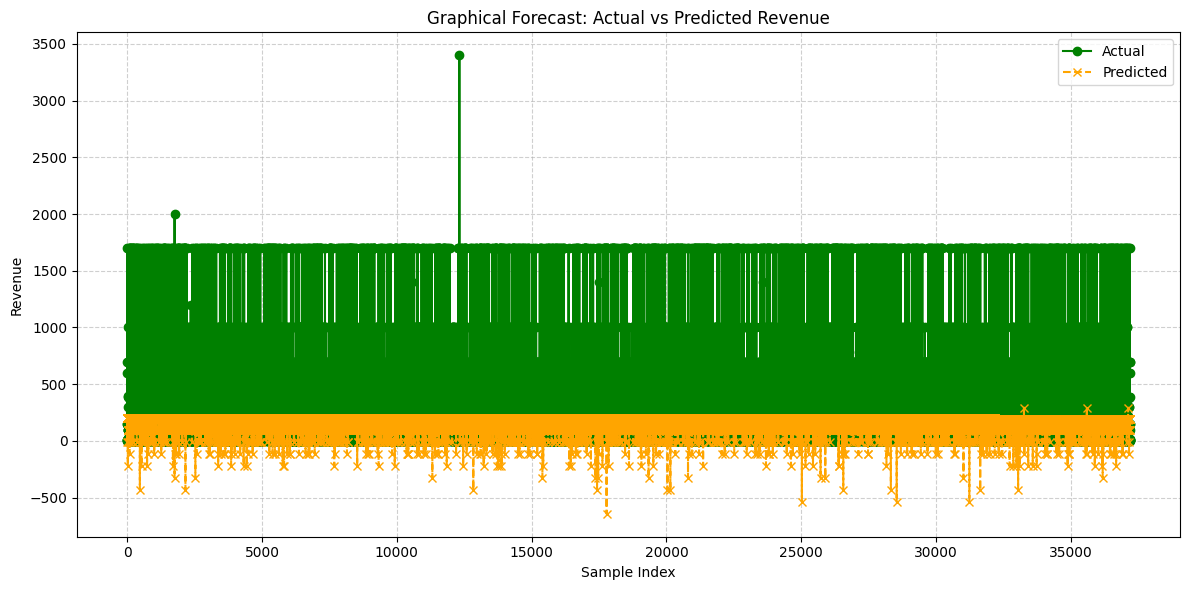


Tabular Forecasts (first 20 rows):
    Actual   Predicted
0    99.99  198.762293
1    11.99  199.366698
2    11.99  198.560824
3   389.99  197.553482
4   700.00  199.165230
5    11.95  198.963761
6    14.95  199.165230
7   150.00  198.157887
8    11.99  197.553482
9   149.99  197.956419
10    2.99  198.560824
11  150.00  198.762293
12   11.95  199.366698
13    3.84  199.165230
14  700.00  199.366698
15   99.99  199.568167
16   23.98   92.814028
17    3.84  198.157887
18   14.95  199.568167
19   99.99  198.560824


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# data set has been taken from kaggle 
#link :https://www.kaggle.com/datasets/aemyjutt/salesdata
df = pd.read_csv("C:/Users/HP/Python/Data Science Projects/sales_data.csv")

# Data Preprocessing
df.columns = [col.strip() for col in df.columns]  
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

if "turnover" not in df.columns:
    df["turnover"] = df["Price Each"] * df["Quantity Ordered"]

# Extract month and year from the date
df["month"] = df["Date"].dt.month
df["year"] = df["Date"].dt.year

# Drop missing values
df.dropna(subset=["month", "year", "Quantity Ordered", "turnover"], inplace=True)

# Features and target
X = df[["month", "year", "Quantity Ordered"]]
y = df["turnover"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Performance Metrics
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")

# Actual vs Predicted Plot
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle="--", color="red", label="Perfect Fit")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.tight_layout()
plt.show()

# Graphical Forecast: Plot actual vs predicted revenue
plt.figure(figsize=(12,6))
sorted_idx = y_test.sort_index().index
plt.plot(y_test.loc[sorted_idx].values, label="Actual", color="green", marker='o', linestyle='-')
plt.plot(pd.Series(y_pred, index=y_test.index).loc[sorted_idx].values, label="Predicted", color="orange", marker='x', linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("Revenue")
plt.title("Graphical Forecast: Actual vs Predicted Revenue")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Tabular Forecasts: Show a sample of actual vs predicted in a table
forecast_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
}).reset_index(drop=True)
print("\nTabular Forecasts (first 20 rows):")
print(forecast_df.head(20))
